# Pre-process the Adult data set

The dataset source:
https://archive.ics.uci.edu/ml/datasets/Adult

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.


Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 
Prediction task is to determine whether a person makes over 50K a year. 

In [1]:
# Import useful pacages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Read the data into a pandas dataframe

In [2]:
# the column names from the dataset describtion file
column_names = ['age','workclass','fnlwgt','education','education-num',
                'marital-status','occupation','relationship','race','sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'target']

In [3]:
# read in the data
data = pd.read_csv('adult_data.csv',  names = column_names, header=0)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Remove the blank space in the begining of each categorical entites

Here I find a very anoying problem, for all the categorical columns the entities in the columns all
begin with a blank space. As shown belown:

In [5]:
data['sex'].iloc[0][0] == ' '

True

In [6]:
data['education'].iloc[0]

' Bachelors'

In [7]:
# get get numerical data columns and categorical data column
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [8]:
# numerical data columns
num_cols   

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [9]:
#categorical data columns
cat_cols   

['relationship',
 'occupation',
 'education',
 'race',
 'native-country',
 'marital-status',
 'sex',
 'workclass',
 'target']

In [10]:
for cat_name in cat_cols: 
    data[cat_name] = data[cat_name].apply(str.strip)

In [11]:
# check the result
data['education'].iloc[0]

'Bachelors'

## Deal with the missing values

There are some missing values in the dataset represent by '?'<br />
We first conver these sting type '?' to Na

In [12]:
# A function to convert '?' to Na
def missing_to_NA(data):
    if data == '?':
        result = np.nan
    else:
        result = data
    return result

In [13]:
# fuunction to process the whole data set
def convert_missing(data_frame):
    cols = data_frame.columns
    for column_name in cols[:-1]:
        data[column_name] = data[column_name].apply(missing_to_NA)
    return data

In [14]:
# convert the whole dataset
data = convert_missing(data)

Visualize of how many missing values represent

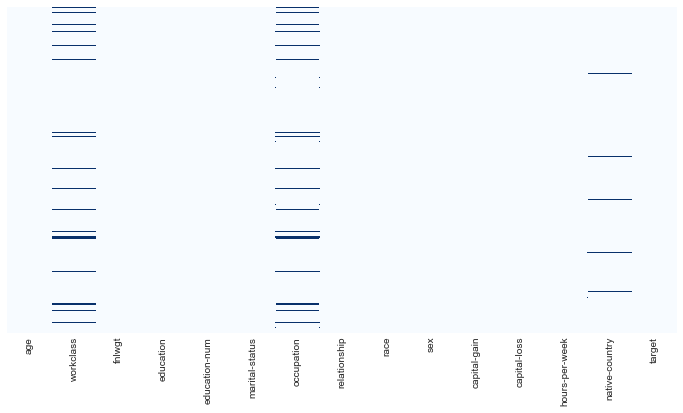

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

Here we see that the missing values are mostly in 'workclass' and 'occupation' column, and the missing values for these two columns comes in pair. <br />
Other missing values comes from column 'native-county'<br />
<br />
Let's check the percentage of missing values for each columns.

In [16]:
# Missing rate for column 'workclass'
data.workclass.isna().sum() / len(data.workclass)

0.05638820638820639

In [17]:
# Missing rate for column 'occupation'
data.occupation.isna().sum() / len(data.occupation)

0.0566031941031941

In [18]:
# Missing rate for column 'workclass'
data['native-country'].isna().sum() / len(data['native-country'])

0.017905405405405406

These missing rate are quite small. And the missing values tend to happens in the same row.<br />
So I will remove the rows with missing values.

In [19]:
clean_data = data.dropna(axis=0)

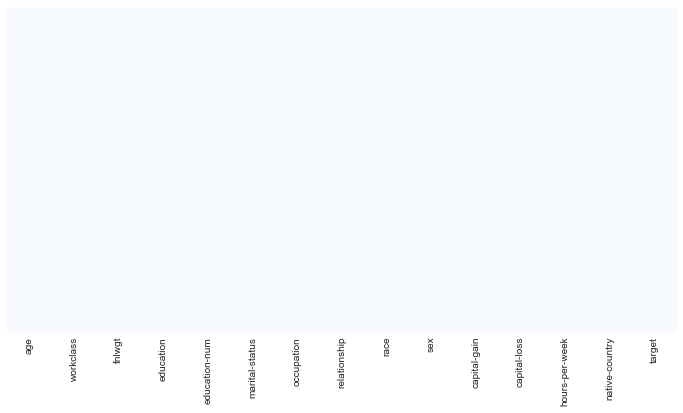

In [20]:
# Check the missing value again
plt.figure(figsize=(12,6))
sns.heatmap(clean_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

Now missing values are all removed. <br />

## Conver taget feature into binary number 0 or 1

In [21]:
def target_convert(word):
    if word == '<=50K':
        result = 0
    else:
        result = 1
    return result

In [22]:
clean_data.target = clean_data.target.apply(target_convert)

/Users/matt/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
clean_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


Save the clean data in to a new file, which will be used for machine learning.

In [24]:
#clean_data.to_csv('clean_data.csv', sep=',', encoding='utf-8', index=False)

## Data visualization

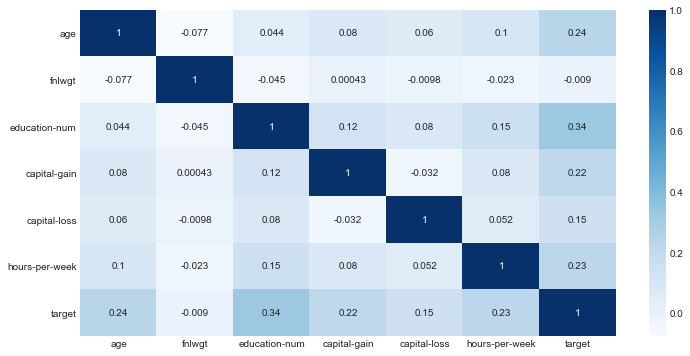

In [25]:
# correlation relations
cor = clean_data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Blues', annot=True)

The education-num has the biggest correlation with the target feature.<br />
Other numerical features also have some correlation with target features.<br />
The fnlwgt has very small negtive correlation with target features.

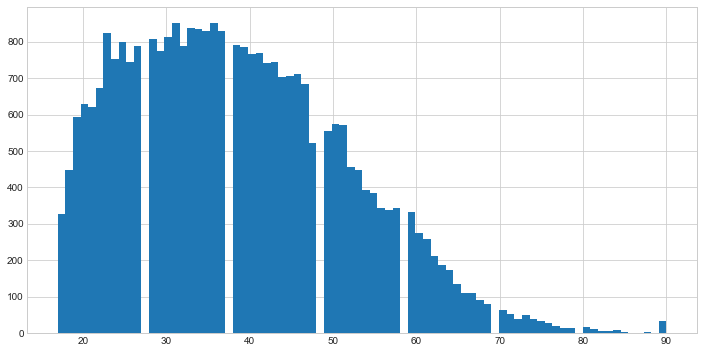

In [26]:
# Check the nemeraical featues' distribution.
plt.figure(figsize=(12,6))
clean_data['age'].hist(bins=80)

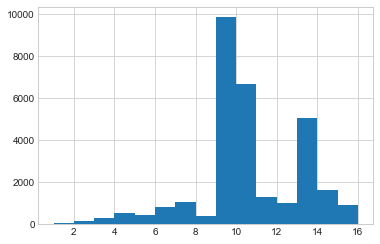

In [27]:
# Education year
clean_data['education-num'].hist(bins=15)

Most people get 9 to 12 years education

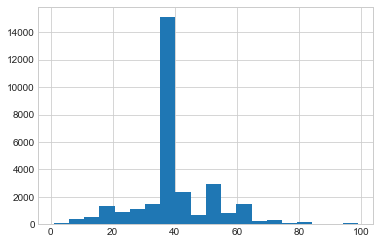

In [28]:
# working hours per week
clean_data['hours-per-week'].hist(bins=20)

Quite understandable, cause most peole work 40 hours (8 hours/day * 5 working days)

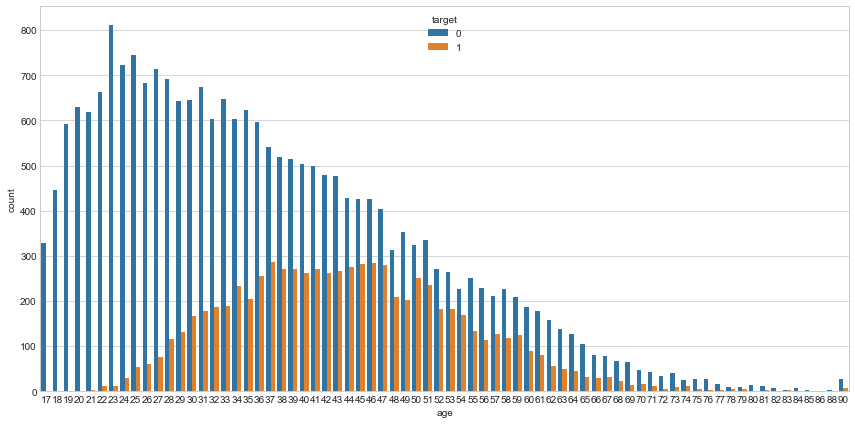

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', hue='target', data=clean_data)
plt.tight_layout()

This result shows that the people who earn over 90K are more likely to have a older age.

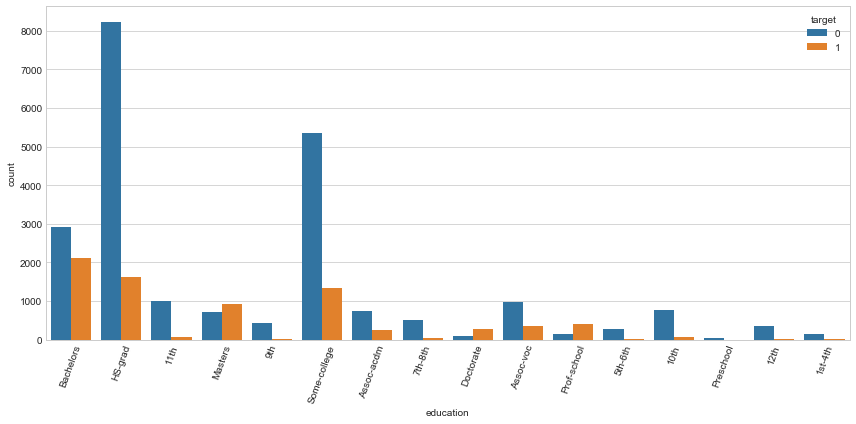

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
sns.countplot('education', hue='target', data=clean_data)
plt.tight_layout()

The people who has high education backgroud like bachalors, master and prof-school tends to earn more. 

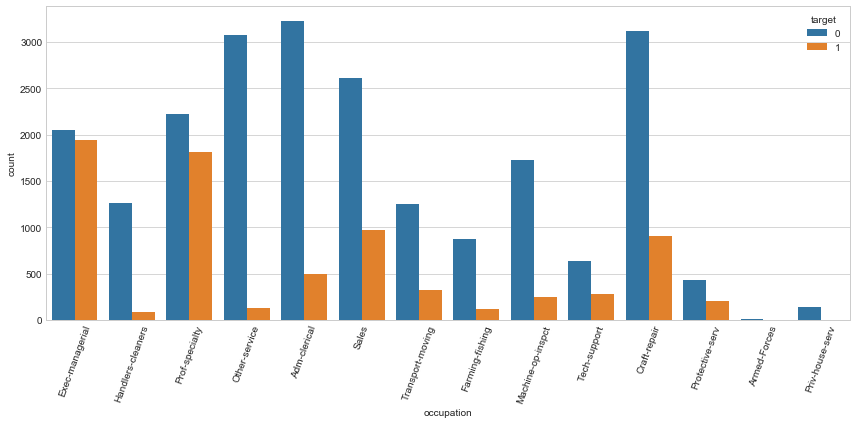

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
sns.countplot('occupation', hue='target', data=clean_data)
plt.tight_layout()

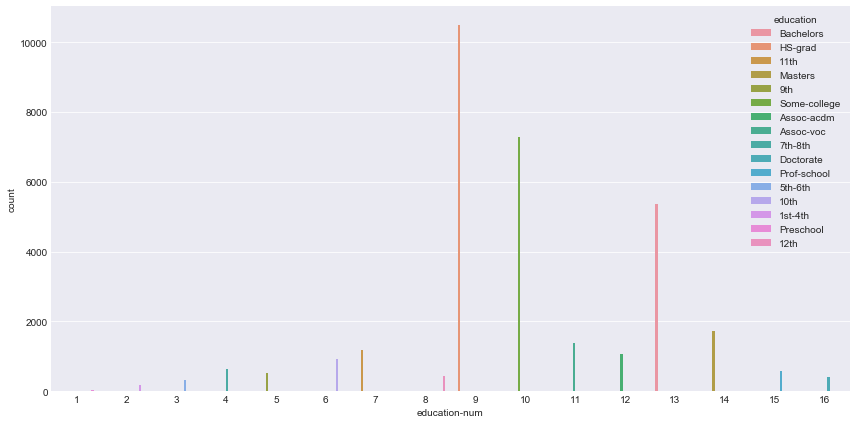

In [32]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x='education-num', hue='education', data=data)
plt.tight_layout()

This result shows taht the education-num and education columns are dependent with each other. A certain year of educations correpsonding to a certain education level. <br/>
So, we may remove the education column since it carry the same informations as eucation-num do.